In [7]:
# %pip install rasterio
# %pip install geopandas
# %pip install fiona
# %pip install earthpy


import numpy as np
import numpy.ma as ma
#from matplotlib import pyplot as plt
import rasterio
import geopandas as gpd
#import rasterstats as rs
#from IPython.display import display
import pandas as pd
import os
import fiona
import rasterio.mask
#import matplotlib.pyplot as plt
import warnings
import rasterio
import rasterio.features
warnings.filterwarnings('ignore') #don't display warnings
from rasterio.mask import mask
#import earthpy.plot as ep
import cv2
import datetime
from tqdm.auto import tqdm

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
root_file = 'C:\\Users\\leoag\\Michigan State University\\MSU Dry Bean Breeding Lab - General\\UAS_Beans\\2021\\SVREC_Mat'
shp_file = "Shapefile_SVREV_P01_03.shp"
img_dir= f"{root_file}/"'b._Orthomosaics/''SVREC_P1'
shp_dir = f"{root_file}/"'c._Shapefiles/'"P01_SVREC_2021"
plot_dir = f"{root_file}/"'e._ClipPlots_BN/''SVREC_P1_512_128'
ground_dir = f"{root_file}/"'d._Ground_notes'

#os.chdir('/content/drive/MyDrive/temp_roi')

#plots_img = '/plots_img'

try:
    os.mkdir(plot_dir)
except:
  pass
# os.chdir(img_dir)
# # Print the current working directory
# print("Current working directory: {0}".format(os.getcwd()))
#DIR_TEST = f'{DIR_INPUT}/test'
plots = gpd.read_file(f'{shp_dir}' f'/{shp_file}')

plots_names=list(plots.columns.values)
print(plots_names)

['fid_1', 'PlotID', 'FID_', 'Global_ID', 'PlotID_ori', 'entry', 'ibloc', 'rep', 'pas', 'rng', 'plot', 'name', 'location', 'year', 'expt', 'harvester', 'f_pedigree', 'm_pedigree', 'fname', 'mname', 'Global_ID_', 'plotwt', 'cwt_a', 'moist', 'flwr', 'ht', 'ldg', 'mtr', 'ds', 'cwtacre', 'early_ht', 'notes', 'sdwt2', 'geometry']


In [10]:
shp_file_info=fiona.open(f'{shp_dir}/'f'{shp_file}', "r") 
#first feature of the shapefile
shp_file_inf = shp_file_info.next()
print(shp_file_inf)

{'type': 'Feature', 'id': '0', 'properties': OrderedDict([('fid_1', 3.0), ('PlotID', '1367'), ('FID_', 0), ('Global_ID', '2101_3031'), ('PlotID_ori', 1367), ('entry', '39'), ('ibloc', '6'), ('rep', '3'), ('pas', 3), ('rng', 12), ('plot', '3031'), ('name', 'B20627'), ('location', 'SVREC'), ('year', '2021'), ('expt', '2101'), ('harvester', '36'), ('f_pedigree', 'B14311/B10244'), ('m_pedigree', 'N11256/N11298'), ('fname', 'B17540'), ('mname', 'N14218'), ('Global_ID_', '21013031'), ('plotwt', '1035'), ('cwt_a', '22.75'), ('moist', '0'), ('flwr', '44'), ('ht', '40'), ('ldg', '0'), ('mtr', '0'), ('ds', '0'), ('cwtacre', 'NA'), ('early_ht', 'NA'), ('notes', '0'), ('sdwt2', '17.83')]), 'geometry': {'type': 'Polygon', 'coordinates': [[(281575.82757895545, 4808337.257552745), (281575.85069695575, 4808338.056777043), (281579.85926852084, 4808337.936497251), (281579.8361505206, 4808337.137272951), (281575.82757895545, 4808337.257552745)]]}}


In [11]:
img_list = os.listdir(img_dir)
img_list = [v for v in img_list if v.endswith('.tif')]
print(img_list)

['07_14_2021_SVREC_RGB_P1.tif', '07_19_2021_SVREC_RGB_P1.tif', '07_28_2021_SVREC_RGB_P1.tif', '08_02_2021_SVREC_RGB_P1.tif', '08_13_2021_SVREC_RGB_P1.tif', '08_18_2021_SVREC_RGB_P1.tif', '08_23_2021_SVREC_RGB_P1.tif', '08_26_2021_SVREC_RGB_P1.tif', '08_30_2021_SVREC_RGB_P1.tif']


In [12]:
# Create an empty list to store the img names
img_list_names = []

for l in range(len(img_list)):
    print(l)
    img_list_names.append(str(img_list[l]))

print(img_list_names)

0
1
2
3
4
5
6
7
8
['07_14_2021_SVREC_RGB_P1.tif', '07_19_2021_SVREC_RGB_P1.tif', '07_28_2021_SVREC_RGB_P1.tif', '08_02_2021_SVREC_RGB_P1.tif', '08_13_2021_SVREC_RGB_P1.tif', '08_18_2021_SVREC_RGB_P1.tif', '08_23_2021_SVREC_RGB_P1.tif', '08_26_2021_SVREC_RGB_P1.tif', '08_30_2021_SVREC_RGB_P1.tif']


In [13]:
plot_num_field_name = "Global_ID_"
trial_name = "SVREC"
planting_date = '06.02.2021'

width = 512 #256
height = 128 #64

In [14]:
# Create an empty list to store DOY from the image names
img_DOY_list = []

for l in range(len(img_list)):
    img_DOY = str(img_list[l]) 
    ts = img_DOY[0:10]
    ts = ts.replace('_', '.')
    fmt = '%m.%d.%Y'

    dt = datetime.datetime.strptime(ts, fmt)
    tt = dt.timetuple()
    tt = tt.tm_yday

    pl = planting_date
    dt2 = datetime.datetime.strptime(pl, fmt)
    tt2 = dt2.timetuple()
    tt2 = tt2.tm_yday

    tt_f = str(tt-tt2).zfill(3)

    img_DOY_list.append(tt_f)

print(img_DOY_list)

['042', '047', '056', '061', '072', '077', '082', '085', '089']


In [15]:
ground_df = pd.read_csv(f"{ground_dir}/"'2021_SVREC_BN_ground_P01.csv')
ground_df= ground_df.astype(str)
ground_list = []

for value in ground_df["Global_ID"]:
    ground_list.append(value)

len(ground_list)

524

In [16]:
from distutils.log import error


if len(ground_list) == len(plots):
    print('Data set has the same lenght to ground and aerial plot numbers')
    print(len(ground_list))
    print(len(plots))

else:
    print('Data set do not merge with ground and aerial plot numbers')
    print(len(ground_list))
    print(len(plots))
    

# len(ground_list)
# len(plots)

Data set do not merge with ground and aerial plot numbers
524
1320


In [17]:
for tiffile in tqdm(img_list_names):
    print(tiffile)

    ts = tiffile[0:10]
    ts = ts.replace('_', '.')
    fmt = '%m.%d.%Y'
    dt = datetime.datetime.strptime(ts, fmt)
    tt = dt.timetuple()
    tt = tt.tm_yday
    pl = planting_date
    dt2 = datetime.datetime.strptime(pl, fmt)
    tt2 = dt2.timetuple()
    tt2 = tt2.tm_yday
    DOY = str(tt-tt2).zfill(3)
    
    noPlot_list = []
    # Plot_ID_list = []
    with fiona.open(f'{shp_dir}/'f'{shp_file}', "r") as shapefile:
    
        for feature in tqdm(shapefile):
            
            Plot_ID = feature["properties"][plot_num_field_name]
            # [k for k in ground_list if Plot_ID in k]  
                      
            if Plot_ID in ground_list:
                shape = [feature["geometry"]]
                # Plot_ID_list.append(Plot_ID)
                        
            # Change the current working directory
                os.chdir(img_dir)
                
                with rasterio.open(tiffile, "r") as ras:
                    out_image, out_transform = mask(ras, shape, crop=True, nodata=0)
                    out_meta = ras.meta
                    
                    out_image = ma.masked_where(out_image == 0, out_image)
                    out_image = ma.filled(out_image.astype(float), np.nan)
                    
                # Change the current working directory
                    os.chdir(f'{plot_dir}')

                    new_img_name = trial_name + '_' + Plot_ID + '_' +  DOY + '.png'
                    
                    out_meta.update({"driver": "PNG",
                    "height": height,
                    "width": width,
                    "transform": out_transform})
                    
                    with rasterio.open(new_img_name, "w", **out_meta) as dest:
                        dest.write(out_image)
                        #print(new_img_name) 

            else:
                noPlot_list.append(Plot_ID)
                pass  

  0%|          | 0/9 [00:00<?, ?it/s]

07_14_2021_SVREC_RGB_P1.tif


  0%|          | 0/1320 [00:00<?, ?it/s]

07_19_2021_SVREC_RGB_P1.tif


  0%|          | 0/1320 [00:00<?, ?it/s]

07_28_2021_SVREC_RGB_P1.tif


  0%|          | 0/1320 [00:00<?, ?it/s]

08_02_2021_SVREC_RGB_P1.tif


  0%|          | 0/1320 [00:00<?, ?it/s]

08_13_2021_SVREC_RGB_P1.tif


  0%|          | 0/1320 [00:00<?, ?it/s]

08_18_2021_SVREC_RGB_P1.tif


  0%|          | 0/1320 [00:00<?, ?it/s]

08_23_2021_SVREC_RGB_P1.tif


  0%|          | 0/1320 [00:00<?, ?it/s]

08_26_2021_SVREC_RGB_P1.tif


  0%|          | 0/1320 [00:00<?, ?it/s]

08_30_2021_SVREC_RGB_P1.tif


  0%|          | 0/1320 [00:00<?, ?it/s]

In [18]:
noPlot_ID_list = pd.DataFrame(noPlot_list, columns=['Plots'])
noPlot_ID_list
#noPlot_ID_list.to_csv('C:\\Users\\leoag\\Michigan State University\\MSU Dry Bean Breeding Lab - General\\UAS_Beans\\2020\\SVREC_Mat\\f._codes\\noPlot.csv')

,Plots
0,21013031
1,21013032
2,21013033
3,21013034
4,21013035
...,...
791,21101006
792,21101007
793,21101008
794,21101009


In [ ]:
#ep.plot_rgb(out_image, rgb=[0, 1, 2], title="Red Green Blue", stretch=True)

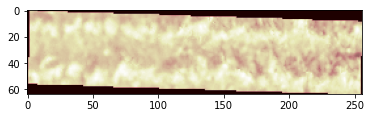

In [ ]:
#plotting
from matplotlib import pyplot
with rasterio.open(new_img_name) as src:
    pyplot.imshow(src.read(1), cmap='pink')
    pyplot.show()